In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib_venn import venn2
import plotly.express as px
import plotly.graph_objects as go

# Load the CSV files as DataFrames
compstak_df = pd.read_csv(r'C:\Users\clint\Desktop\compstak-analysis\Data\compstak.csv')

In [19]:
doe_df = pd.read_csv(r'C:\Users\clint\Desktop\compstak-analysis\src\DOE.csv')

In [20]:
compstak_df

,Property Type,Property Subtype,Property Id,State
0,Retail,Parking,1,NY
1,Retail,Apartments,2,NY
2,Office,NaN,3,NY
3,Retail,NaN,4,NY
4,Office,Mixed-Use,5,NY
...,...,...,...,...
759618,NaN,NaN,3611385,NY
759619,Industrial,Flex/R&D,3611389,FL
759620,Industrial,Flex/R&D,3611390,FL
759621,NaN,NaN,3611391,CA


In [21]:
doe_df

,statecode,reported_propertytype,reported_propertysubtype,compstak_equivalent_category
0,CT,Flex,Light Manufacturing,Industrial
1,CT,Industrial,Warehouse,Industrial
2,CT,Industrial,NaN,Industrial
3,CT,Multi-Family,Apartments,Multi-Family
4,CT,Multi-Family,Apartments,Multi-Family
...,...,...,...,...
2246480,WI,Retail,Storefront Retail/Office,Retail
2246481,WI,Retail,Storefront Retail/Office,Retail
2246482,WI,Retail,NaN,Retail
2246483,WI,Retail,NaN,Retail


In [22]:
#show me Mixed-Use propety type entries in the compstak_df show me unique entries in property subtype
mixed_use_df = compstak_df[compstak_df['Property Type'] == 'Mixed-Use']
mixed_use_df['Property Subtype'].unique()


array(['Street Retail/Storefront', 'Mixed-Use', 'Condominium',
       'Educational/School', nan, 'General Retail', 'Apartments',
       'Super-Regional Center/Mall', 'Shopping Centers',
       'Medical/Healthcare', 'Community/Recreation Center',
       'Business Park', 'Flex/R&D', 'Hospitality Related',
       'Department Store', 'Parking', 'Life Science/Lab',
       'Warehouse/Distribution', 'Municipality/Public Service',
       'Sports & Recreation', 'Restaurant/Bar', 'Student Housing',
       'Creative', 'Vacant Land', 'Self-Storage',
       'Neighborhood Shopping Center', 'Special Purpose',
       'Financial Building', 'Assembly/Meeting Place',
       'Convenience/Strip Center', 'Community Shopping Center',
       'Fuel & Service Station', 'Light Industrial',
       'Refrigerated/Cold Storage', 'Automotive', 'Freestanding',
       'Special Industrial', 'Manufacturing', 'Showroom',
       'Mobile Home Park'], dtype=object)

In [23]:

mixed_use_df = compstak_df[compstak_df['Property Type'] == 'Land']
mixed_use_df['Property Subtype'].unique()

array(['Vacant Land', 'Hospitality Related', 'Flex/R&D', nan,
       'Light Industrial', 'Financial Building',
       'Super-Regional Center/Mall', 'Parking', 'Apartments',
       'Communication/Data Center', 'General Retail', 'Life Science/Lab',
       'Warehouse/Distribution', 'Automotive', 'Showroom',
       'Fuel & Service Station', 'Medical/Healthcare', 'Condominium',
       'Freestanding', 'Mixed-Use', 'Restaurant/Bar', 'Transportation',
       'Industrial Outdoor Storage', 'Self-Storage', 'Special Industrial',
       'Neighborhood Shopping Center', 'Community Shopping Center',
       'Heavy Industrial', 'Educational/School', 'Outlet',
       'Department Store', 'Municipality/Public Service',
       'Sports & Recreation', 'Manufacturing', 'Mobile Home Park',
       'Convenience/Strip Center', 'Drive Thru', 'Funeral/Mortuary',
       'Shopping Centers', 'Student Housing', 'Assembly/Meeting Place',
       'Bank', 'Business Park', 'Special Purpose', 'Under Construction',
       'Day

In [24]:
doe_df.loc[
    (doe_df['compstak_equivalent_category'] == 'Unmapped') & 
    (doe_df['reported_propertytype'] == 'Specialty'), 
    'compstak_equivalent_category'
] = 'Other'


In [25]:
doe_df.loc[
    (doe_df['reported_propertytype'] == 'Flex') & 
    (doe_df['compstak_equivalent_category'] == 'Unmapped'), 
    'compstak_equivalent_category'
] = 'Industrial'

In [26]:
doe_df.loc[
    (doe_df['reported_propertytype'] == 'Health Care') & 
    (doe_df['compstak_equivalent_category'] == 'Unmapped'), 
    'compstak_equivalent_category'
] = 'Other'

In [27]:
unique_categories = doe_df['compstak_equivalent_category'].unique()
unique_categories

array(['Industrial', 'Multi-Family', 'Office', 'Retail', 'Other', 'Hotel'],
      dtype=object)

In [28]:
# show me all unique entries in unmapped_rows reported_propertytype
unmapped_rows = doe_df[doe_df['compstak_equivalent_category'] == 'Unmapped']
unmapped_rows['reported_propertytype'].unique()

array([], dtype=object)

In [29]:
unmapped_rows = doe_df[doe_df['compstak_equivalent_category'] == 'Unmapped']
unmapped_rows

,statecode,reported_propertytype,reported_propertysubtype,compstak_equivalent_category


In [30]:
# Create the sunburst visualization without requiring a full merge
# First, count the occurrences of each category in both datasets
doe_category_counts = doe_df['compstak_equivalent_category'].value_counts().reset_index()
doe_category_counts.columns = ['compstak_equivalent_category', 'count']
compstak_property_counts = compstak_df['Property Type'].value_counts().reset_index()
compstak_property_counts.columns = ['Property Type', 'count']

# Print the size of each dataset to understand the dimensions
print(f"DOE dataset size: {len(doe_df)} rows")
print(f"CompStak dataset size: {len(compstak_df)} rows")
print(f"DOE unique categories: {len(doe_category_counts)}")
print(f"CompStak unique property types: {len(compstak_property_counts)}")

# Find common categories between the two datasets
doe_category_counts['compstak_equivalent_category'] = doe_category_counts['compstak_equivalent_category'].astype(str)
compstak_property_counts['Property Type'] = compstak_property_counts['Property Type'].astype(str)

# Create a small mapping dataframe of common categories
common_categories = set(doe_category_counts['compstak_equivalent_category']).intersection(
    set(compstak_property_counts['Property Type'])
)
print(f"Number of common categories: {len(common_categories)}")

# Create a dataframe for visualization with hierarchy information
sunburst_data = []

# Add DOE categories as first level
for _, row in doe_category_counts.iterrows():
    category = row['compstak_equivalent_category']
    count = row['count']
    # First level - DOE category
    sunburst_data.append({
        'id': category,
        'parent': '',
        'value': count,
        'label': category
    })
    
    # Check if this category exists in CompStak
    if category in common_categories:
        # Add CompStak entries as second level
        matching_compstak = compstak_property_counts[compstak_property_counts['Property Type'] == category]
        for _, cs_row in matching_compstak.iterrows():
            sunburst_data.append({
                'id': f"{category}_{cs_row['Property Type']}",
                'parent': category,
                'value': cs_row['count'],
                'label': cs_row['Property Type']
            })

# Create DataFrame from the assembled data
sunburst_df = pd.DataFrame(sunburst_data)

# Create sunburst chart using the prepared data
fig = go.Figure(go.Sunburst(
    ids=sunburst_df['id'],
    labels=sunburst_df['label'],
    parents=sunburst_df['parent'],
    values=sunburst_df['value'],
    branchvalues='total'
))

fig.update_layout(
    title='CompStak Coverage by Property Type',
    margin=dict(t=30, b=30, l=0, r=0)
)

fig.show()

# Save the figure
fig.write_html("../Images/plots/category_sunburst.html")
fig.write_image("../Images/plots/category_sunburst.png")

DOE dataset size: 2246485 rows
CompStak dataset size: 759623 rows
DOE unique categories: 6
CompStak unique property types: 8
Number of common categories: 6


In [31]:
# Define the mapping from CompStak property subtypes to DOE-compliant property types
property_to_doe_mapping = {
    # Retail
    'Street Retail/Storefront': 'Retail',
    'General Retail': 'Retail',
    'Super-Regional Center/Mall': 'Retail',
    'Shopping Centers': 'Retail',
    'Neighborhood Shopping Center': 'Retail',
    'Convenience/Strip Center': 'Retail',
    'Community Shopping Center': 'Retail',
    'Department Store': 'Retail',
    'Restaurant/Bar': 'Retail',
    'Fuel & Service Station': 'Retail',
    'Freestanding': 'Retail',
    'Automotive': 'Retail',
    'Outlet': 'Retail',
    'Drive Thru': 'Retail',
     'Showroom': 'Retail',

    # Industrial
    'Warehouse/Distribution': 'Industrial',
    'Light Industrial': 'Industrial',
    'Heavy Industrial': 'Industrial',
    'Refrigerated/Cold Storage': 'Industrial',
    'Manufacturing': 'Industrial',
    'Special Industrial': 'Industrial',
    'Industrial Outdoor Storage': 'Industrial',
    'Flex/R&D': 'Industrial',
    'Processing': 'Industrial',
    'Life Science/Lab': 'Industrial',

    # Office
    'Business Park': 'Office',
    'Professional Building': 'Office',
    'Financial Building': 'Office',
    'Bank': 'Office',
    'Creative': 'Office',

    # Multi-Family
    'Apartments': 'Multi-Family',
    'Student Housing': 'Multi-Family',
    'Mobile Home Park': 'Multi-Family',
    'Condominium': 'Multi-Family',
    'Senior Housing': 'Multi-Family',
    'Housing': 'Multi-Family',

    # Hotel
    'Hospitality Related': 'Hotel',

    # Other
    'Self-Storage': 'Other',
    'Vacant Land': 'Other',
    'Mixed-Use': 'Other',
    'Medical/Healthcare': 'Other',
    'Hospital/Healthcare Facility': 'Other',
    'Day Care Facility': 'Other',
    'Parking': 'Other',
    'Funeral/Mortuary': 'Other',
    'Communication/Data Center': 'Other',
    'Assembly/Meeting Place': 'Other',
    'Municipality/Public Service': 'Other',
    'Educational/School': 'Other',
    'Community/Recreation Center': 'Other',
    'Sports & Recreation': 'Other',
    'Transportation': 'Other',
    'Special Purpose': 'Other',
    'Live/Work': 'Other',
    'Under Construction': 'Other'
}

# Create a copy of the dataframe to preserve the original
compstak_mapped_df = compstak_df.copy()

# Initialize the DOE_Compliant_Property_Type column with NaN values
compstak_mapped_df['DOE_Compliant_Property_Type'] = pd.NA

# Step 1: For Mixed-Use and Land property types, look at the property subtype
mixed_use_land_mask = compstak_mapped_df['Property Type'].isin(['Mixed-Use', 'Land'])
has_subtype_mask = ~compstak_mapped_df['Property Subtype'].isna()

# For Mixed-Use and Land properties that have a subtype, map based on the subtype
mixed_use_land_with_subtype = mixed_use_land_mask & has_subtype_mask
compstak_mapped_df.loc[mixed_use_land_with_subtype, 'DOE_Compliant_Property_Type'] = \
    compstak_mapped_df.loc[mixed_use_land_with_subtype, 'Property Subtype'].map(property_to_doe_mapping)

# Step 2: For Mixed-Use and Land properties without a subtype, classify them as 'Other'
mixed_use_land_without_subtype = mixed_use_land_mask & ~has_subtype_mask
compstak_mapped_df.loc[mixed_use_land_without_subtype, 'DOE_Compliant_Property_Type'] = 'Other'

# Step 3: For all other property types, map directly using Property Subtype if available
other_types_with_subtype = ~mixed_use_land_mask & has_subtype_mask
compstak_mapped_df.loc[other_types_with_subtype, 'DOE_Compliant_Property_Type'] = \
    compstak_mapped_df.loc[other_types_with_subtype, 'Property Subtype'].map(property_to_doe_mapping)

# Step 4: For entries where mapping by subtype didn't work or subtype is missing,
# use the original Property Type
remaining_unmapped = compstak_mapped_df['DOE_Compliant_Property_Type'].isna()
compstak_mapped_df.loc[remaining_unmapped, 'DOE_Compliant_Property_Type'] = \
    compstak_mapped_df.loc[remaining_unmapped, 'Property Type']

# Step 5: Handle entries where Property Type is also NaN (fallback to 'Other')
null_property_type = compstak_mapped_df['DOE_Compliant_Property_Type'].isna()
compstak_mapped_df.loc[null_property_type, 'DOE_Compliant_Property_Type'] = 'Other'

# Print some statistics about the mapping
print(f"Mixed-Use and Land properties with subtypes: {mixed_use_land_with_subtype.sum()}")
print(f"Mixed-Use and Land properties without subtypes (classified as Other): {mixed_use_land_without_subtype.sum()}")
print(f"Other properties with subtypes: {other_types_with_subtype.sum()}")
print(f"Properties that defaulted to original Property Type: {remaining_unmapped.sum()}")
print(f"Properties that defaulted to 'Other' due to null Property Type: {null_property_type.sum()}")

# Display the first few rows of the dataframe with the new column
print("\nFirst few rows with DOE-compliant property types:")
compstak_mapped_df.head

Mixed-Use and Land properties with subtypes: 31195
Mixed-Use and Land properties without subtypes (classified as Other): 22495
Other properties with subtypes: 515173
Properties that defaulted to original Property Type: 191894
Properties that defaulted to 'Other' due to null Property Type: 27790

First few rows with DOE-compliant property types:


<bound method NDFrame.head of        Property Type Property Subtype  Property Id State  \
0             Retail          Parking            1    NY   
1             Retail       Apartments            2    NY   
2             Office              NaN            3    NY   
3             Retail              NaN            4    NY   
4             Office        Mixed-Use            5    NY   
...              ...              ...          ...   ...   
759618           NaN              NaN      3611385    NY   
759619    Industrial         Flex/R&D      3611389    FL   
759620    Industrial         Flex/R&D      3611390    FL   
759621           NaN              NaN      3611391    CA   
759622           NaN              NaN      3611399    NY   

       DOE_Compliant_Property_Type  
0                            Other  
1                     Multi-Family  
2                           Office  
3                           Retail  
4                            Other  
...                        

DOE-Compliant Distribution for Mixed-Use properties:
DOE_Compliant_Property_Type
Other           3405
Retail           130
Multi-Family     122
Industrial        30
Hotel             11
Office             9
Name: count, dtype: int64

DOE-Compliant Distribution for Land properties:
DOE_Compliant_Property_Type
Other           40041
Retail           3904
Multi-Family     3123
Industrial       2208
Hotel             403
Office            304
Name: count, dtype: int64


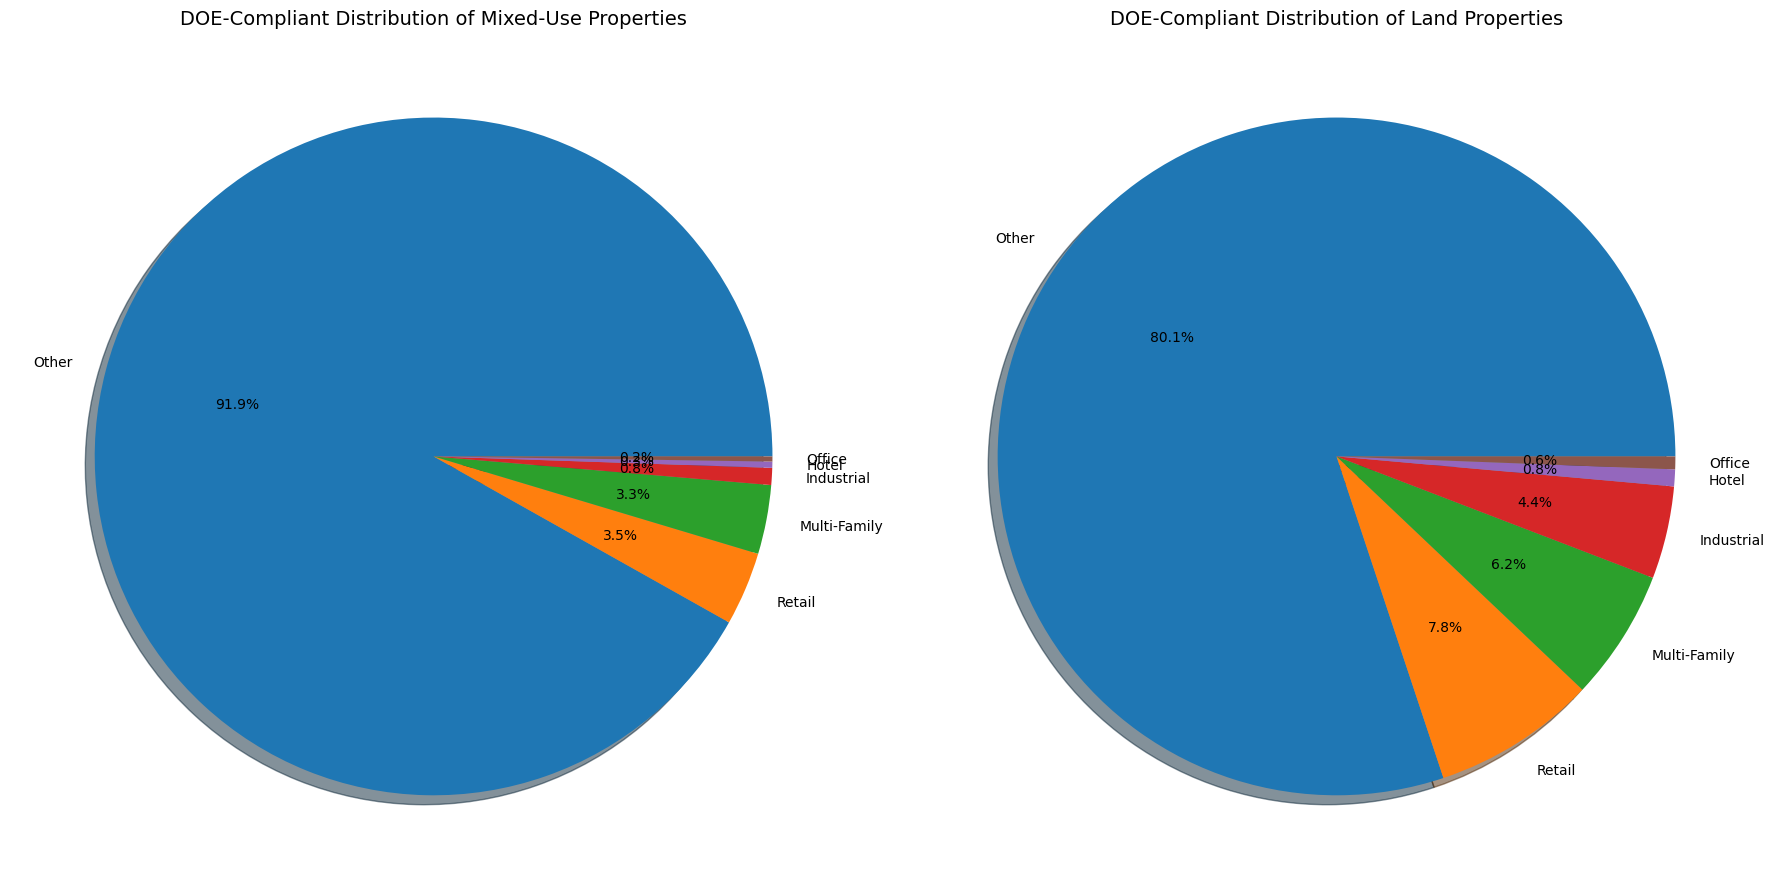


Overall Distribution of DOE-compliant property types after enhanced mapping:
DOE_Compliant_Property_Type
Retail          195522
Industrial      183106
Other           167732
Multi-Family    114427
Office           88768
Hotel            10068
Name: count, dtype: int64


In [32]:
# Analyze the distribution of DOE-compliant property types for Mixed-Use and Land properties
mixed_use_mapping = compstak_mapped_df[compstak_mapped_df['Property Type'] == 'Mixed-Use']['DOE_Compliant_Property_Type'].value_counts()
land_mapping = compstak_mapped_df[compstak_mapped_df['Property Type'] == 'Land']['DOE_Compliant_Property_Type'].value_counts()

print("DOE-Compliant Distribution for Mixed-Use properties:")
print(mixed_use_mapping)

print("\nDOE-Compliant Distribution for Land properties:")
print(land_mapping)

# Visualize the redistribution of Mixed-Use and Land properties
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# Mixed-Use distribution
if len(mixed_use_mapping) > 0:
    mixed_use_mapping.plot.pie(ax=ax1, autopct='%1.1f%%', shadow=True)
    ax1.set_title('DOE-Compliant Distribution of Mixed-Use Properties', fontsize=14)
    ax1.set_ylabel('')
else:
    ax1.text(0.5, 0.5, 'No Mixed-Use properties found', ha='center', va='center', fontsize=14)
    ax1.axis('off')

# Land distribution
if len(land_mapping) > 0:
    land_mapping.plot.pie(ax=ax2, autopct='%1.1f%%', shadow=True)
    ax2.set_title('DOE-Compliant Distribution of Land Properties', fontsize=14)
    ax2.set_ylabel('')
else:
    ax2.text(0.5, 0.5, 'No Land properties found', ha='center', va='center', fontsize=14)
    ax2.axis('off')

plt.tight_layout()
plt.savefig('../Images/plots/mixed_use_land_doe_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Compare the overall distribution before and after the enhanced mapping
doe_compliant_counts = compstak_mapped_df['DOE_Compliant_Property_Type'].value_counts()
print("\nOverall Distribution of DOE-compliant property types after enhanced mapping:")
print(doe_compliant_counts)

In [33]:
# Save the mapped ComptStak DataFrame to CSV
output_filepath = r'C:\Users\clint\Desktop\compstak-analysis\Data\compstak_mapped.csv'
compstak_mapped_df.to_csv(output_filepath, index=False)
print(f"Successfully saved DOE-mapped ComptStak data to: {output_filepath}")
print(f"Total rows: {len(compstak_mapped_df)}")

Successfully saved DOE-mapped ComptStak data to: C:\Users\clint\Desktop\compstak-analysis\Data\compstak_mapped.csv
Total rows: 759623


In [34]:
# Save the DOE DataFrame to CSV
doe_output_filepath = r'C:\Users\clint\Desktop\compstak-analysis\Data\DOE_mapped.csv'
doe_df.to_csv(doe_output_filepath, index=False)
print(f"Successfully saved DOE mapped data to: {doe_output_filepath}")
print(f"Total rows: {len(doe_df)}")

Successfully saved DOE mapped data to: C:\Users\clint\Desktop\compstak-analysis\Data\DOE_mapped.csv
Total rows: 2246485
